# Tesla Stock Analysis

## About this Project and Me

Hello, my name is Joseph Kemper. I am a Business Management student with an emphasis in Computer Programming. My goal behind choosing this project is to demonstrate what I am capable of and to build my skills for future projects. Future projects I have planned involve a large amount of data analysis and this project will serve as a good stepping stone to my long term goals. 

Goal of Analysis: Find what if any patterns that exist in Tesla Stock performance.

# Data Preparation

In [8]:
import pandas
import matplotlib.pyplot as pyplot
%matplotlib inline

# Load data into DataFrame
raw_data = pandas.read_csv ('RawData.csv')

# Make Copy of data to clean
cleaned_data = raw_data

# Prep list of columns to remove dollar sign from
columns_to_clean = ["Close/Last","Open","High","Low"]

# Loop over columns and remove all dollar signs and set all numbers as float
for column in columns_to_clean:
    cleaned_data [column] = cleaned_data [column].replace({'\$':''}, regex=True).astype(float)

# Convert data in "Date" column to a date data type
cleaned_data ["Date"] = pandas.to_datetime(cleaned_data["Date"])

# Convert data in "Volume" column to Int64 to better handle large numbers while allowing for the data to handle nullable values
cleaned_data ["Volume"] = cleaned_data["Volume"].astype("int64")

# Save the cleaned data to a new CSV file
cleaned_data.to_csv ("CleanedData.csv", index=False)

# Get the summary statistics
raw_summary = cleaned_data.describe()

# Print the summary
print(raw_summary)

                                Date   Close/Last        Volume         Open  \
count                           2516  2516.000000  2.516000e+03  2516.000000   
mean   2018-11-01 12:19:27.567567360    90.346463  1.141232e+08    90.378079   
min              2013-11-01 00:00:00     8.033300  1.065415e+07     7.958700   
25%              2016-05-03 18:00:00    15.488975  6.623726e+07    15.518825   
50%              2018-10-30 12:00:00    21.321650  9.307683e+07    21.264700   
75%              2021-05-03 06:00:00   190.947450  1.340551e+08   191.469950   
max              2023-10-31 00:00:00   409.970000  9.140809e+08   411.470000   
std                              NaN   107.398548  7.681395e+07   107.498260   

              High          Low  
count  2516.000000  2516.000000  
mean     92.434231    88.214102  
min       8.181300     7.740000  
25%      15.751825    15.235850  
50%      21.644300    20.922350  
75%     196.258325   186.032500  
max     414.496600   405.666600  
std    

# Data Preparation

In [26]:
prepped_data = cleaned_data
# Adding Volatility measure (defined as High - Low) Column
prepped_data ["Volatility"] = round(prepped_data["High"] - prepped_data["Low"],2)
# Adding average price between high and low values
prepped_data ["HighLowAverage"] = round((prepped_data["High"] + prepped_data["Low"])/2,2)
# Adding column to track days stock gained value
prepped_data ["GainedValue"] = prepped_data ["Close/Last"] - prepped_data["Open"] > 0
# Create column containing the day of the week
prepped_data ["DayOfWeek"] = prepped_data["Date"].dt.day_name()
# Create column containing the name of the month
prepped_data ["Month"] = prepped_data["Date"].dt.month_name()
# Create column containing month abbreviation
prepped_data ["MonthAbbr"] = prepped_data["Month"].str.slice(0,3)
# Create column containing the week of the year
prepped_data ["WeekNumber"] = prepped_data["Date"].dt.isocalendar().week
# Create column containing the calendar quarter
prepped_data ["Quarter"] = prepped_data["Date"].dt.quarter
# Create column containing day of the month
prepped_data ["DayOfMonth"] = prepped_data["Date"].dt.day
# Create column containing day of the year
prepped_data ["DayOfYear"] = prepped_data["Date"].dt.dayofyear

prepped_data.to_csv("PreppedData.csv", index=False)

prepped_summary = prepped_data.describe()
print(prepped_summary)

                                Date   Close/Last        Volume         Open  \
count                           2516  2516.000000  2.516000e+03  2516.000000   
mean   2018-11-01 12:19:27.567567360    90.346463  1.141232e+08    90.378079   
min              2013-11-01 00:00:00     8.033300  1.065415e+07     7.958700   
25%              2016-05-03 18:00:00    15.488975  6.623726e+07    15.518825   
50%              2018-10-30 12:00:00    21.321650  9.307683e+07    21.264700   
75%              2021-05-03 06:00:00   190.947450  1.340551e+08   191.469950   
max              2023-10-31 00:00:00   409.970000  9.140809e+08   411.470000   
std                              NaN   107.398548  7.681395e+07   107.498260   

              High          Low  WeekNumber      Quarter   DayOfMonth  \
count  2516.000000  2516.000000      2516.0  2516.000000  2516.000000   
mean     92.434231    88.214102   26.641097     2.513911    15.744436   
min       8.181300     7.740000         1.0     1.000000    

# Data Visualization

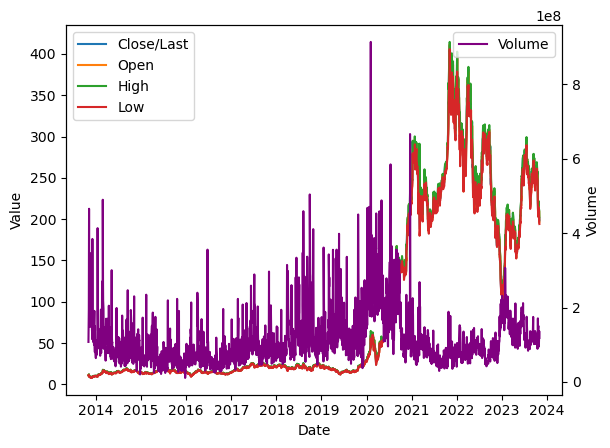

In [27]:
# Create base figure and subplots
figure, subplot_array = pyplot.subplots(5, sharex=True, figsize=(10,15))

# Plot the "Close/Last" values on the first subplot
close_subplot = subplot_array[0]
close_subplot.plot(prepped_data['Date'], prepped_data['Close/Last'], label='Close/Last', color='blue')
close_subplot.set_ylabel("Close/Last")
close_subplot.legend(loc="upper left")




# Data Summarization

Count of the unique values in the data

In [19]:
# List of columns in data
columns_to_count = ["Date","Close/Last","Volume","Open","High","Low","Volatility","HighLowAverage","GainedValue","DayOfWeek","Month","MonthAbbr","WeekNumber","Quarter","DayOfMonth","DayOfYear"]

# Create a new DataFrame to store values
data_point_summary = pandas.DataFrame(columns=["Column", "UniqueValues"])

# Loop over columns and count each unique data point
for column in columns_to_count:
    number_unique_values = prepped_data[column].nunique()
    new_row = pandas.DataFrame({"Column": column, "UniqueValues": number_unique_values}, index=[0])
    data_point_summary = pandas.concat([data_point_summary, new_row], ignore_index=True)

# Show DataFrame
print (data_point_summary)

            Column UniqueValues
0             Date         2516
1       Close/Last         2450
2           Volume         2516
3             Open         2391
4             High         2377
5              Low         2401
6       Volatility          872
7   HighLowAverage         1860
8      GainedValue            2
9        DayOfWeek            5
10           Month           12
11       MonthAbbr           12
12      WeekNumber           53
13         Quarter            4
14      DayOfMonth           31
15       DayOfYear          364


#### Question 1: Is price volatility (a wide gap between high and low prices) good or bad for Tesla closing prices?

In [25]:
# Get Volatility statistics
volatility_summary = prepped_data["Volatility"].describe()
mean_volatility = volatility_summary["mean"]
std_volatility = volatility_summary["std"]
min_volatility = volatility_summary["min"]
first_quartile_volatility = volatility_summary["25%"]
median = volatility_summary["50%"]
third_quartile_volatility = volatility_summary["75%"]
max_volatility = volatility_summary["max"]
volatility_mode = prepped_data["Volatility"].mode()
volatility_counts = prepped_data["Volatility"].value_counts()


print(volatility_summary)
print(f"Mode {volatility_mode[0]}") 
print(f"The mode of 0.37 appears in the data {volatility_counts[0.37]} times.")

count    2516.000000
mean        4.220242
std         6.351198
min         0.140000
25%         0.460000
50%         0.810000
75%         6.920000
max        91.310000
Name: Volatility, dtype: float64
Mode 0.37
The mode of 0.37 appears in the data 44 times.
